In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline

In [200]:
data = pd.read_excel(r'/Users/shakhawathossainturag/Downloads/HT_NT_Data.xlsx')

# haushalt_prices_without_VAT = pd.read_excel(r'/Users/shakhawathossainturag/Downloads/HT_NT_Data.xlsx",sheet_name='5.8.3 Strom - € - haushalt', skiprows = 5, nrows = 26, index_col = 0)
data.head()

,Hour of the Day,Price (Euro/MWh),Unnamed: 2,Mean HT (Euro/MWh),Unnamed: 4,dtDate,intHour,dblPrice,Mean Yearly Price (Euro/MWh),dtDate.1,...,Mean HT,dtDate.2,intHour.2,dblPrice.2,Mean NT,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Haupt Traif (HT): 8:00-19:00
0,8.0,27.21,NaN,32.119344,Wednesday,2020-01-01,1,41.88,30.471694,2020-01-01,...,NaN,2020-01-01,1,41.88,NaN,NaN,NaN,NaN,NaN,Neben Tarif (NT): 20:00-7:00 + Weekends
1,9.0,27.96,NaN,NaN,NaN,2020-01-01,2,38.60,NaN,2020-01-01,...,NaN,2020-01-01,2,38.60,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,25.50,NaN,NaN,NaN,2020-01-01,3,36.55,NaN,2020-01-01,...,NaN,2020-01-01,3,36.55,NaN,NaN,NaN,NaN,NaN,NaN
3,11.0,21.97,NaN,NaN,NaN,2020-01-01,4,32.32,NaN,2020-01-01,...,NaN,2020-01-01,4,32.32,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,20.27,NaN,NaN,NaN,2020-01-01,5,30.85,NaN,2020-01-01,...,NaN,2020-01-01,5,30.85,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
data

,Hour of the Day,Price (Euro/MWh),Unnamed: 2,Mean HT (Euro/MWh),Unnamed: 4,dtDate,intHour,dblPrice,Mean Yearly Price (Euro/MWh),dtDate.1,...,Mean HT,dtDate.2,intHour.2,dblPrice.2,Mean NT,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Haupt Traif (HT): 8:00-19:00
0,8.0,27.21,NaN,32.119344,Wednesday,2020-01-01,1,41.88,30.471694,2020-01-01,...,NaN,2020-01-01,1,41.88,NaN,NaN,NaN,NaN,NaN,Neben Tarif (NT): 20:00-7:00 + Weekends
1,9.0,27.96,NaN,NaN,NaN,2020-01-01,2,38.60,NaN,2020-01-01,...,NaN,2020-01-01,2,38.60,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,25.50,NaN,NaN,NaN,2020-01-01,3,36.55,NaN,2020-01-01,...,NaN,2020-01-01,3,36.55,NaN,NaN,NaN,NaN,NaN,NaN
3,11.0,21.97,NaN,NaN,NaN,2020-01-01,4,32.32,NaN,2020-01-01,...,NaN,2020-01-01,4,32.32,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,20.27,NaN,NaN,NaN,2020-01-01,5,30.85,NaN,2020-01-01,...,NaN,2020-01-01,5,30.85,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,NaN,NaN,NaN,NaN,NaN,2020-12-31,20,59.47,NaN,2020-12-31,...,NaN,2020-12-31,20,59.47,NaN,NaN,NaN,NaN,NaN,NaN
8780,NaN,NaN,NaN,NaN,NaN,2020-12-31,21,56.70,NaN,2020-12-31,...,NaN,2020-12-31,21,56.70,NaN,NaN,NaN,NaN,NaN,NaN
8781,NaN,NaN,NaN,NaN,NaN,2020-12-31,22,52.44,NaN,2020-12-31,...,NaN,2020-12-31,22,52.44,NaN,NaN,NaN,NaN,NaN,NaN
8782,NaN,NaN,NaN,NaN,NaN,2020-12-31,23,51.86,NaN,2020-12-31,...,NaN,2020-12-31,23,51.86,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
new_data = data[["dtDate.2", "intHour.2", "dblPrice.2"]]
new_data = new_data.rename(columns={"dtDate.2": "Date", "intHour.2": "hour", "dblPrice.2": "price"})
new_data.head()

,Date,hour,price
0,2020-01-01,1,41.88
1,2020-01-01,2,38.60
2,2020-01-01,3,36.55
3,2020-01-01,4,32.32
4,2020-01-01,5,30.85


In [203]:
# https://stackoverflow.com/questions/47150709/how-to-create-a-calendar-table-date-dimension-in-pandas

def create_date_table(start='2020-01-01', end='2020-12-31'):
    start_ts = pd.to_datetime(start).date()

    end_ts = pd.to_datetime(end).date()

    # record timetsamp is empty for now
    dates =  pd.DataFrame(columns=['Record_timestamp'],
        index=pd.date_range(start_ts, end_ts))
    dates.index.name = 'Date'

    days_names = {
        i: name
        for i, name
        in enumerate(['Monday', 'Tuesday', 'Wednesday',
                      'Thursday', 'Friday', 'Saturday', 
                      'Sunday'])
    }

    dates['Day'] = dates.index.dayofweek.map(days_names.get)
    dates['Month'] = dates.index.month
    dates.reset_index(inplace=True)
    dates.index.name = 'date_id'
    return dates

In [204]:
df = create_date_table()
df = df[["Date", "Day"]]
df

,Date,Day
date_id,,
0,2020-01-01,Wednesday
1,2020-01-02,Thursday
2,2020-01-03,Friday
3,2020-01-04,Saturday
4,2020-01-05,Sunday
...,...,...
361,2020-12-27,Sunday
362,2020-12-28,Monday
363,2020-12-29,Tuesday


In [205]:
df_with_data = pd.merge(new_data, df, how="inner", on="Date")

In [206]:
df_with_data

,Date,hour,price,Day
0,2020-01-01,1,41.88,Wednesday
1,2020-01-01,2,38.60,Wednesday
2,2020-01-01,3,36.55,Wednesday
3,2020-01-01,4,32.32,Wednesday
4,2020-01-01,5,30.85,Wednesday
...,...,...,...,...
8779,2020-12-31,20,59.47,Thursday
8780,2020-12-31,21,56.70,Thursday
8781,2020-12-31,22,52.44,Thursday
8782,2020-12-31,23,51.86,Thursday


In [207]:
df_with_data.to_excel("ht_nt_price.xlsx")

In [1]:
def haupt_tarif(data):
    #haupt_tarrif = df_with_data
    df_with_data = pd.read_excel(data)
    yearly_mean = df_with_data.price.mean()
    haupt_tarrif = df_with_data[df_with_data["hour"].isin([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]) & df_with_data["Day"].isin(['Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday'])]
    cond = df_with_data['hour'].isin(haupt_tarrif['hour'])
    df_with_data.drop(haupt_tarrif[cond].index, inplace = True)
    ht_factor = haupt_tarrif.price.mean()/yearly_mean
    return ht_factor

def neben_tarif(data):
    #neben_tarrif = df_with_data
    df_with_data = pd.read_excel(data)
    yearly_mean = df_with_data.price.mean()
    neben_tarrif = df_with_data[(df_with_data["hour"].isin([1, 2, 3, 4, 5, 6, 7, 20, 21, 22, 23, 24]) & df_with_data["Day"].isin(['Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday'])) |(df_with_data["Day"].isin(['Saturday', 'Sunday']))]
    neben_tarrif.head()
    cond = df_with_data['hour'].isin(neben_tarrif['hour'])
    df_with_data.drop(neben_tarrif[cond].index, inplace = True)
    nt_factor = neben_tarrif.price.mean()/yearly_mean
    return nt_factor

    haupt_tarif("ht_nt_price.xlsx")

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
[7.015 6.185 5.68  6.14  6.425 6.75  6.795 6.785 6.515 6.1   6.08  6.1
 6.085 6.07 ]


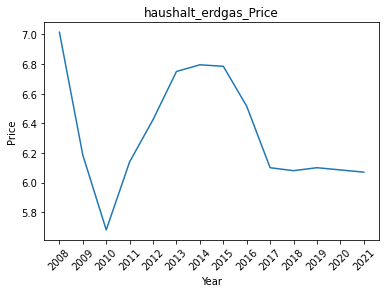

In [10]:
from typing import ValuesView
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline

def plotting(x,y, title, x_label, y_label, name_plot):
    fig = plt.figure()
    values = x
    plt.plot (x,y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(x,values)
    plt.xticks(rotation = 45) 
    fig.savefig(name_plot, dpi=fig.dpi)

def extrapolate(df):
    new_df = df
    new_df["year"] = new_df["year"].astype(int)
    year = new_df["year"]
    price = new_df["price"]
    f = interpolate.interp1d(year, price, fill_value = "extrapolate")
    p_2021 = f(2021)

    new_year = np.append(year, 2021)
    new_price = np.append(price, (f(2021)))
    return new_year, new_price

#erdgas Hausholds

haushalt_prices_without_VAT = pd.read_excel(r'/Users/shakhawathossainturag/Downloads/Energiepreisentwicklung.xlsx',sheet_name='5.3.2  Erdgas-€-Haushalte', skiprows = 5, nrows = 26, index_col = 0)
haushalt_prices_without_VAT = haushalt_prices_without_VAT.iloc[:,0]
haushalt_prices_without_VAT = haushalt_prices_without_VAT.reset_index()
haushalt_prices_without_VAT

haushalt_prices_without_VAT[["index"]]= haushalt_prices_without_VAT["index"].str.slice(start = 5)
haushalt_prices_without_VAT.columns = ["year","price"]
haushalt_prices_without_VAT = haushalt_prices_without_VAT.set_index("year")
haushalt_prices_without_VAT

haushalt_prices_without_VAT.index = haushalt_prices_without_VAT.index.astype(str)
haushalt_prices_without_VAT.index =  pd.to_datetime(haushalt_prices_without_VAT.index, errors='ignore')
haushalt_prices_without_VAT = haushalt_prices_without_VAT.astype(float)
haushalt_prices_without_VAT = haushalt_prices_without_VAT.resample('12M').mean()
haushalt_prices_without_VAT.index = haushalt_prices_without_VAT.index.astype(str)
haushalt_prices_without_VAT

haushalt_prices_without_VAT.index= haushalt_prices_without_VAT.index.str.slice(start = 0, stop = -6)


haushalt_prices_without_VAT = haushalt_prices_without_VAT.reset_index()
haushalt_prices_without_VAT

new_year, new_price = extrapolate(haushalt_prices_without_VAT)

# new_price = new_price * ht_factor
print(new_year)
print(new_price)
plotting(new_year, new_price, "haushalt_erdgas_Price", "Year", "Price", "images/haushalt_erdgas_Price.png")

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
[3.915 3.44  3.4   3.615 3.47  3.755 3.365 3.075 2.645 2.58  2.61  2.59
 2.32  2.05 ]


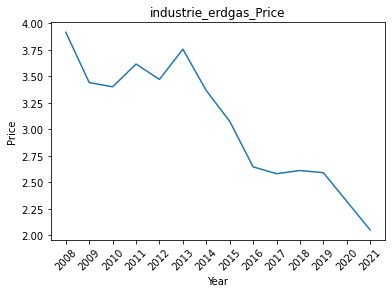

In [11]:
from typing import ValuesView
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
#erdgas Hausholds

industrie_prices_without_VAT = pd.read_excel(r'/Users/shakhawathossainturag/Downloads/Energiepreisentwicklung.xlsx',sheet_name='5.3.3  Erdgas-€-Unternehmen', skiprows = 5, nrows = 26, index_col = 0)
industrie_prices_without_VAT = industrie_prices_without_VAT.iloc[:,0]
industrie_prices_without_VAT = industrie_prices_without_VAT.reset_index()
industrie_prices_without_VAT

industrie_prices_without_VAT[["index"]]= industrie_prices_without_VAT["index"].str.slice(start = 5)
industrie_prices_without_VAT.columns = ["year","price"]
industrie_prices_without_VAT = industrie_prices_without_VAT.set_index("year")
industrie_prices_without_VAT

industrie_prices_without_VAT.index = industrie_prices_without_VAT.index.astype(str)
industrie_prices_without_VAT.index =  pd.to_datetime(industrie_prices_without_VAT.index, errors='ignore')
industrie_prices_without_VAT = industrie_prices_without_VAT.astype(float)
industrie_prices_without_VAT = industrie_prices_without_VAT.resample('12M').mean()
industrie_prices_without_VAT.index = industrie_prices_without_VAT.index.astype(str)
industrie_prices_without_VAT

industrie_prices_without_VAT.index= industrie_prices_without_VAT.index.str.slice(start = 0, stop = -6)


industrie_prices_without_VAT = industrie_prices_without_VAT.reset_index()
industrie_prices_without_VAT

new_year, new_price = extrapolate(industrie_prices_without_VAT)

# new_price = new_price * ht_factor
print(new_year)
print(new_price)
plotting(new_year, new_price, "industrie_erdgas_Price", "Year", "Price", "images/industrie_erdgas_Price.png")

In [12]:
from typing import ValuesView
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
#erdgas Hausholds

Braunkohle_prices_without_VAT = pd.read_excel(r'/Users/shakhawathossainturag/Downloads/Energiepreisentwicklung.xlsx',sheet_name='5.1 Steinkohle und Braunkohle', skiprows = 27, nrows = 16, usecols = "A,N")
Braunkohle_prices_without_VAT.columns = ["year","price"]
Braunkohle_prices_without_VAT.index = Braunkohle_prices_without_VAT["year"]
#industrie_prices_without_VAT.index = industrie_prices_without_VAT.index.astype(str)
Braunkohle_prices_without_VAT  = Braunkohle_prices_without_VAT[["price"]]
Braunkohle_prices_without_VAT.index= Braunkohle_prices_without_VAT.index.str.slice(start = 0, stop = 4)

Braunkohle_prices_without_VAT = Braunkohle_prices_without_VAT.reset_index()

new_year, new_price = extrapolate(Braunkohle_prices_without_VAT)
print(new_year)
print(new_price)
plotting(new_year, new_price, "Braunkohle_prices", "Year", "Price", "images/Braunkohle_prices.png")

In [13]:
from typing import ValuesView
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
#erdgas Hausholds

Steinkohle_prices_without_VAT = pd.read_excel(r'/Users/shakhawathossainturag/Downloads/Energiepreisentwicklung.xlsx',sheet_name='5.1 Steinkohle und Braunkohle', skiprows = 6, nrows = 16, usecols = "A,N")
Steinkohle_prices_without_VAT.columns = ["year","price"]
Steinkohle_prices_without_VAT.index = Steinkohle_prices_without_VAT["year"]
#industrie_prices_without_VAT.index = industrie_prices_without_VAT.index.astype(str)
Steinkohle_prices_without_VAT  = Steinkohle_prices_without_VAT[["price"]]
Steinkohle_prices_without_VAT.index= Steinkohle_prices_without_VAT.index.str.slice(start = 0, stop = 4)
Steinkohle_prices_without_VAT

Steinkohle_prices_without_VAT = Steinkohle_prices_without_VAT.reset_index()

new_year, new_price = extrapolate(Steinkohle_prices_without_VAT)
print(new_year)
print(new_price)
plotting(new_year, new_price, "Steinkohle_prices", "Year", "Price", "images/Steinkohle_prices.png")

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#erdgas Hausholds

# Anzulegende Werte in Cent/kWh - Marktprämienmodell:
df = pd.read_excel(r'DegressionsVergSaetze_05-07_21.xlsx',sheet_name='Solar', skiprows = 6, nrows = 18, usecols = "J:M")
df.columns = ["Inbetriebnahme", "bis_10_kW", "bis_40_kW", "bis_750_kW"]
mask1 = df["bis_40_kW"].isnull()
#mask2 = df["bis_750_kW"].isnull()
#df.loc[mask1, "bis_10_kW"] = df.loc[mask1, "bis_40_kW"]
#df.loc[mask2, "bis_10_kW"] = df.loc[mask2, "bis_750_kW"]
df['bis_40_kW'] = np.where(df['bis_40_kW'].isnull(), df['bis_10_kW'], df['bis_40_kW'])
df['bis_750_kW'] = np.where(df['bis_750_kW'].isnull(), df['bis_10_kW'], df['bis_750_kW'])
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 2", "")
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 3", "")
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 4", "")
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 5", "")
df

,Inbetriebnahme,bis_10_kW,bis_40_kW,bis_750_kW
0,ab 01.01.2021,8.560000,8.330000,6.620000
1,Degression,0.014000,0.014000,0.014000
2,ab 01.02.2021,8.440160,8.213380,6.527320
3,Rundung,8.440000,8.210000,6.530000
4,Degression,0.014000,0.014000,0.014000
5,ab 01.03.2021,8.321998,8.098393,6.435938
6,Rundung,8.320000,8.100000,6.440000
7,Degression,0.014000,0.014000,0.014000
8,ab 01.04.2021,8.205490,7.985015,6.345834
9,Rundung,8.210000,7.990000,6.350000


In [60]:
# Vergütungssätze in Cent/kWh - Feste Einspeisevergütung:
 
df = pd.read_excel(r'DegressionsVergSaetze_05-07_21.xlsx',sheet_name='Solar', skiprows = 32, nrows = 7, usecols = "J:M")
df.columns = ["Inbetriebnahme", "bis_10_kW", "bis_40_kW", "bis_750_kW"]
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 2", "")
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 3", "")
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 4", "")
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 5", "")
df

,Inbetriebnahme,bis_10_kW,bis_40_kW,bis_750_kW
0,ab 01.01.2021,8.16,7.93,6.22
1,ab 01.02.2021,8.04,7.81,6.13
2,ab 01.03.2021,7.92,7.70,6.04
3,ab 01.04.2021,7.81,7.59,5.95
4,ab 01.05.2021,7.69,7.47,5.86
5,ab 01.06.2021,7.58,7.36,5.77
6,ab 01.07.2021,7.47,7.25,5.68


In [61]:
# Anzulegende Werte für den Mieterstromzuschlag in Cent/kWh

df = pd.read_excel(r'DegressionsVergSaetze_05-07_21.xlsx',sheet_name='Solar', skiprows = 46, nrows = 19, usecols = "J:M")
df.columns = ["Inbetriebnahme", "bis_10_kW", "bis_40_kW", "bis_750_kW"]
mask1 = df["bis_40_kW"].isnull()
#mask2 = df["bis_750_kW"].isnull()
#df.loc[mask1, "bis_10_kW"] = df.loc[mask1, "bis_40_kW"]
#df.loc[mask2, "bis_10_kW"] = df.loc[mask2, "bis_750_kW"]
df['bis_40_kW'] = np.where(df['bis_40_kW'].isnull(), df['bis_10_kW'], df['bis_40_kW'])
df['bis_750_kW'] = np.where(df['bis_750_kW'].isnull(), df['bis_10_kW'], df['bis_750_kW'])
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 2", "")
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 3", "")
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 4", "")
df["Inbetriebnahme"] = df["Inbetriebnahme"].str.replace(" 5", "")
df


,Inbetriebnahme,bis_10_kW,bis_40_kW,bis_750_kW
0,ab 01.01.2021,3.790000,3.520000,2.370000
1,Degression,0.014000,0.014000,0.014000
2,ab 01.02.2021,3.736940,3.470720,2.336820
3,Rundung,3.740000,3.470000,2.340000
4,Degression,0.014000,0.014000,0.014000
5,ab 01.03.2021,3.684623,3.422130,2.304105
6,Rundung,3.680000,3.420000,2.300000
7,Degression,0.014000,0.014000,0.014000
8,ab 01.04.2021,3.633038,3.374220,2.271847
9,Rundung,3.630000,3.370000,2.270000
